In [1]:
import pandas as pd
import bs4
import json
import re
import seaborn as sns
import requests
import time
import numpy as np
%matplotlib inline

In [2]:
with open("job_data") as json_file:
    job_data = json.load(json_file)

In [3]:
df_jobs = pd.DataFrame(job_data)
df_jobs = df_jobs[["job title", "company", "job location", "machine learning", "deep learning", "data mining", "neural network",
                   " nlp ", "natural language processing", "text mining", "computer vision", "decision tree", "big data", 
                    "visualization", "database", "web scraping", "data structures", "programming", 
                    "algorithm", "software development", "software engineering", "web development", "python", 
                    "c++", " java ", "matlab", " r ", "scala", "javascript", "tensorflow", "caffe", "torch", 
                    "sql", "mongodb", "hadoop", "hive", "spark", "mapreduce", "aws", "azure", "tableau","math", 
                    "computer science", "statistics", "physics","engineering", "graduate degree", "phd", "bachelor", "master"]]

In [4]:
df_jobs

,job title,company,job location,machine learning,deep learning,data mining,neural network,nlp,natural language processing,text mining,...,tableau,math,computer science,statistics,physics,engineering,graduate degree,phd,bachelor,master
0,Director of Software Engineering/Magento eComm...,Chaparral Motorsports,"San Bernardino, CA 92410",0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
1,Data Scientist / Analytic Consultant 4,Wells Fargo,"Philadelphia, PA",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Salesforce Solution Architect,Silverline Jobs,"Philadelphia, PA",0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,Strategic Business Developer - Powder Metals/I...,Carpenter Technology Corporation,"Philadelphia, PA 19103 (Belmont area)",0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,Technical Sales Representative / Sales Engineer,Ecolab,"Philadelphia, PA",0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5,"Manager, Workday Application Delivery & Support",PFM,"Philadelphia, PA",0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
6,Project Manager I,Philadelphia Redevelopment Authority,"Philadelphia, PA 19107 (City Center East area)",0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,Director of Contract Strategy,United BioSource Corporation (UBC),"Philadelphia, PA",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,Sr. Web Engineer,Outward Inc,"Charlotte, NC",0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
9,Senior .Net/Cloud Software Engineer,"T4S Partners, Inc.","Englewood, CO 80111",0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### Most desired skills

In [5]:
skill_series = df_jobs[["machine learning", "deep learning", "data mining", "neural network", " nlp ", 
                        "natural language processing", "text mining", "computer vision", "decision tree", "big data", 
                        "visualization", "database", "web scraping", "data structures", "programming", 
                        "algorithm", "software development", "software engineering", "web development", "python", 
                        "c++", " java ", "matlab", " r ", "scala", "javascript", "tensorflow", "caffe", "torch", 
                        "sql", "mongodb", "hadoop", "hive", "spark", "mapreduce", "aws", "azure", "tableau"]].sum(axis = 0).sort_values(ascending=False)

[Text(0,0.5,u'Count'), Text(0.5,0,u'Skills')]

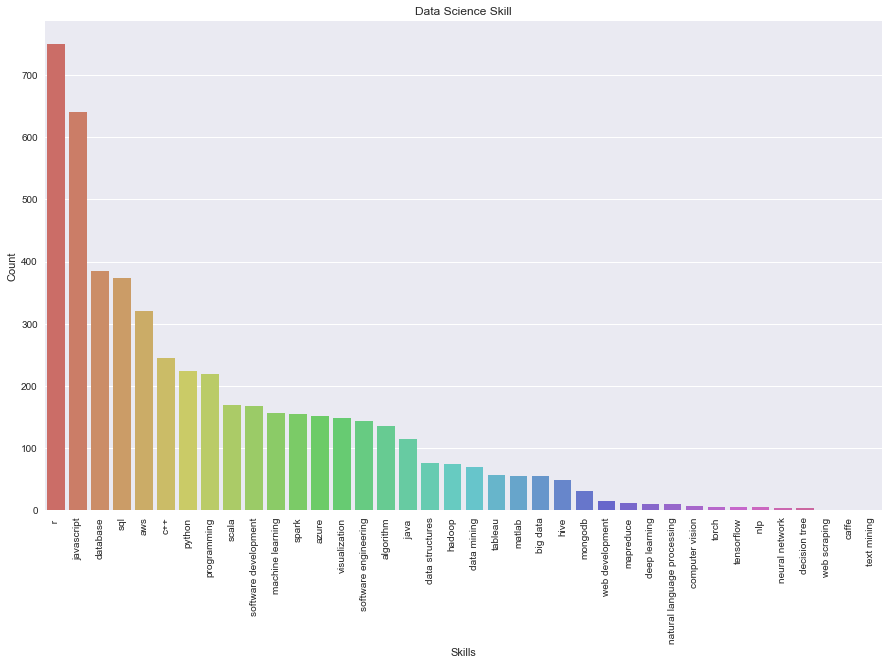

In [6]:
sns.set(rc={'figure.figsize':(15,9)})
g = sns.barplot(skill_series.index, skill_series.values, palette = 'hls')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Data Science Skill')
g.set(xlabel = 'Skills', ylabel = 'Count')

In [7]:
skill_series

 r                             750
javascript                     641
database                       385
sql                            374
aws                            321
c++                            244
python                         224
programming                    219
scala                          169
software development           167
machine learning               157
spark                          155
azure                          152
visualization                  148
software engineering           144
algorithm                      135
 java                          114
data structures                 75
hadoop                          74
data mining                     70
tableau                         57
matlab                          55
big data                        55
hive                            48
mongodb                         31
web development                 15
mapreduce                       11
deep learning                   10
natural language pro

In [8]:
states = [re.sub("[^a-zA-Z]+", "", re.sub("[\(\[].*?[\)\]]", "", loc))[-2:].upper() for loc in df_jobs['job location']]
df_jobs.insert(3, "state", states)

In [9]:
df_jobs

,job title,company,job location,state,machine learning,deep learning,data mining,neural network,nlp,natural language processing,...,tableau,math,computer science,statistics,physics,engineering,graduate degree,phd,bachelor,master
0,Director of Software Engineering/Magento eComm...,Chaparral Motorsports,"San Bernardino, CA 92410",CA,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
1,Data Scientist / Analytic Consultant 4,Wells Fargo,"Philadelphia, PA",PA,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Salesforce Solution Architect,Silverline Jobs,"Philadelphia, PA",PA,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,Strategic Business Developer - Powder Metals/I...,Carpenter Technology Corporation,"Philadelphia, PA 19103 (Belmont area)",PA,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,Technical Sales Representative / Sales Engineer,Ecolab,"Philadelphia, PA",PA,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5,"Manager, Workday Application Delivery & Support",PFM,"Philadelphia, PA",PA,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
6,Project Manager I,Philadelphia Redevelopment Authority,"Philadelphia, PA 19107 (City Center East area)",PA,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,Director of Contract Strategy,United BioSource Corporation (UBC),"Philadelphia, PA",PA,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,Sr. Web Engineer,Outward Inc,"Charlotte, NC",NC,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
9,Senior .Net/Cloud Software Engineer,"T4S Partners, Inc.","Englewood, CO 80111",CO,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [10]:
state_series = df_jobs["state"].value_counts()[:10]
state_series.sort_values(ascending = False)

PA    622
MI    110
UT     89
NJ     80
CA     77
IA     70
VT     60
CO     49
NC     39
MD     26
Name: state, dtype: int64

[Text(0,0.5,u'count'), Text(0.5,0,u'States')]

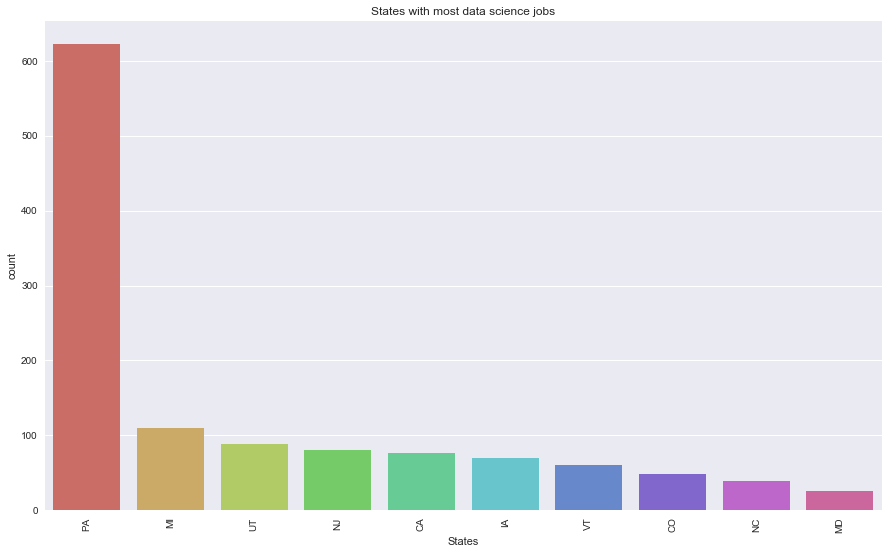

In [11]:
sns.set(rc = {"figure.figsize":(15,9)})
g = sns.barplot(state_series.index, state_series.values, palette = "hls")
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title("States with most data science jobs")
g.set(xlabel = "States", ylabel = "count")

In [12]:
company_series = df_jobs["company"].value_counts()[:20]
company_series.sort_values(ascending = False)

Plante & Moran                           71
EMC Insurance                            67
Vermont Mutual Insurance                 60
Progressive Leasing                      49
T4S Partners, Inc.                       48
Comcast                                  44
Beaumont Health                          33
Children's Hospital of Philadelphia      26
Advantus Corp                            25
Outward Inc                              24
Chaparral Motorsports                    24
SAP                                      20
ASML                                     19
IQVIA                                    18
Johnson & Johnson Family of Companies    17
KPMG                                     16
Icon plc                                 16
Temple University Health System          16
Intelligent Waves Llc                    15
Citi                                     12
Name: company, dtype: int64

[Text(0,0.5,u'count'), Text(0.5,0,u'States')]

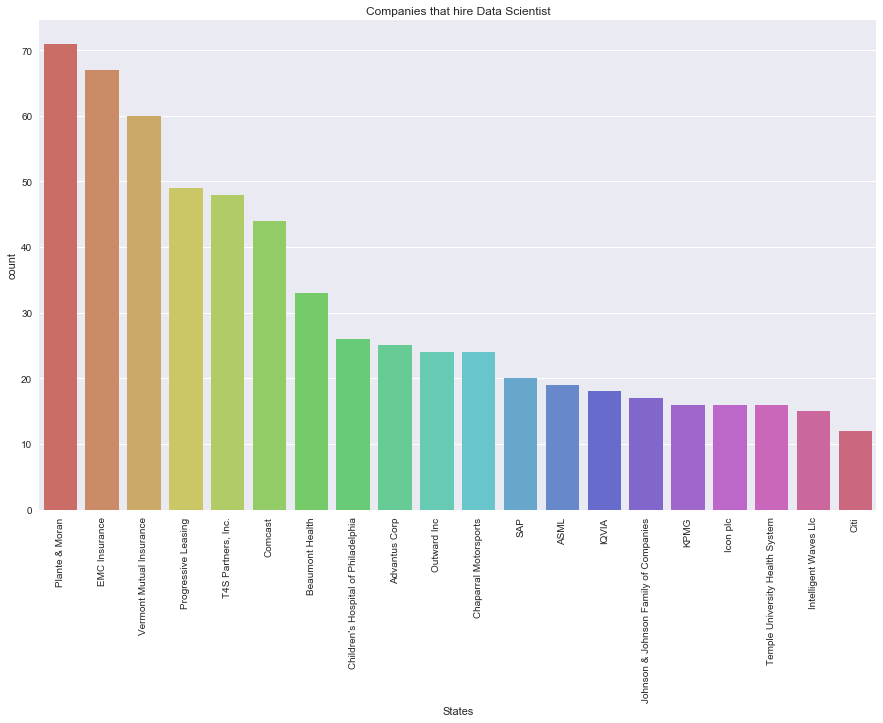

In [13]:
g = sns.barplot(company_series.index, company_series.values, palette = "hls")
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title("Companies that hire Data Scientist")
g.set(xlabel = "States", ylabel = "count")

In [14]:
PA_df = df_jobs[df_jobs["state"] == "PA"]
skill_series_PA = PA_df[["machine learning", "deep learning", "data mining","neural network"," nlp ", 
                         "natural language processing", "text mining", "computer vision", "decision tree", 
                         "big data", "visualization", "database", "web scraping", "data structures", "programming", 
                         "algorithm", "software development", "software engineering", "web development", "python", "c++", 
                         " java ", "matlab", " r ", "scala", "javascript", "tensorflow", "caffe", "torch", 
                         "sql", "mongodb", "hadoop", "hive", "spark", "mapreduce", "aws", "azure", "tableau"]].sum(axis = 0).sort_values(ascending = False)

In [15]:
skill_series_PA

 r                             322
javascript                     304
database                       159
aws                            105
sql                            102
programming                     94
scala                           81
c++                             69
 java                           60
software development            59
spark                           56
python                          56
machine learning                44
algorithm                       43
big data                        37
software engineering            34
hive                            26
azure                           25
visualization                   22
hadoop                          22
data structures                 12
tableau                         12
mapreduce                        7
data mining                      7
web development                  6
natural language processing      5
deep learning                    5
torch                            4
matlab              

[Text(0,0.5,u'Count'), Text(0.5,0,u'Skills')]

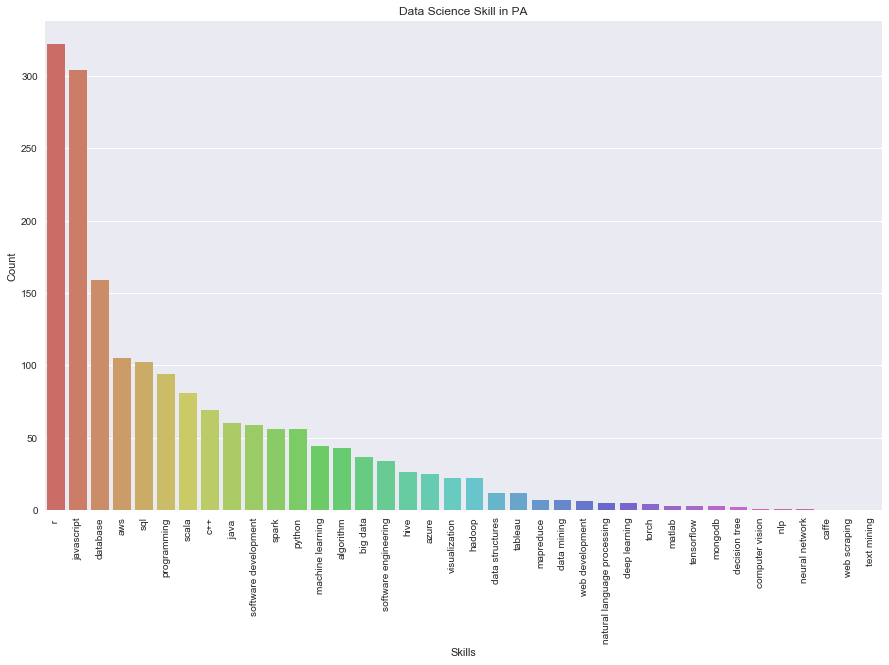

In [16]:
sns.set(rc={'figure.figsize':(15,9)})
g = sns.barplot(skill_series_PA.index, skill_series_PA.values, palette = 'hls')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Data Science Skill in PA')
g.set(xlabel = 'Skills', ylabel = 'Count')

In [17]:
degree_series = df_jobs[["math", "computer science", "statistics", "physics", "engineering", "graduate degree", 
                     "phd", "bachelor", "master"]].sum(axis = 0).sort_values(ascending = False)

In [18]:
degree_series

bachelor            724
computer science    691
math                532
engineering         509
master              494
statistics          185
physics             117
phd                  41
graduate degree      14
dtype: int64

[Text(0,0.5,u'Count'), Text(0.5,0,u'Skills')]

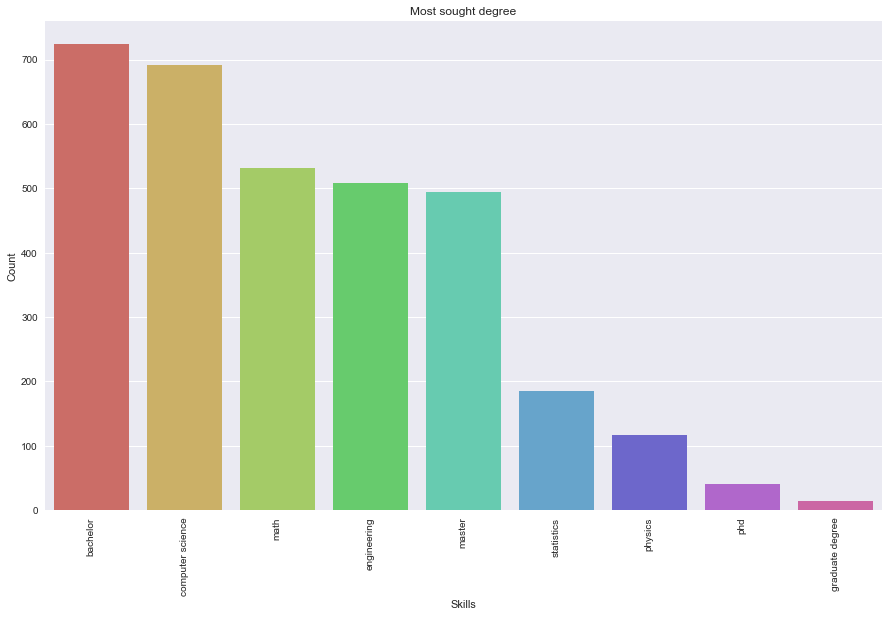

In [19]:
sns.set(rc={'figure.figsize':(15,9)})
g = sns.barplot(degree_series.index, degree_series.values, palette = 'hls')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Most sought degree')
g.set(xlabel = 'Skills', ylabel = 'Count')

In [20]:
with open("job_data_ML") as json_file:
    job_data_ML = json.load(json_file)

In [21]:
df_jobs_ML = pd.DataFrame(job_data)
df_jobs_ML = df_jobs[["job title", "company", "job location", "machine learning", "deep learning", "data mining", "neural network",
                   " nlp ", "natural language processing", "text mining", "computer vision", "decision tree", "big data", 
                    "visualization", "database", "web scraping", "data structures", "programming", 
                    "algorithm", "software development", "software engineering", "web development", "python", 
                    "c++", " java ", "matlab", " r ", "scala", "javascript", "tensorflow", "caffe", "torch", 
                    "sql", "mongodb", "hadoop", "hive", "spark", "mapreduce", "aws", "azure", "tableau","math", 
                    "computer science", "statistics", "physics","engineering", "graduate degree", "phd", "bachelor", "master"]]

In [22]:
df_jobs_ML

,job title,company,job location,machine learning,deep learning,data mining,neural network,nlp,natural language processing,text mining,...,tableau,math,computer science,statistics,physics,engineering,graduate degree,phd,bachelor,master
0,Director of Software Engineering/Magento eComm...,Chaparral Motorsports,"San Bernardino, CA 92410",0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
1,Data Scientist / Analytic Consultant 4,Wells Fargo,"Philadelphia, PA",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Salesforce Solution Architect,Silverline Jobs,"Philadelphia, PA",0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,Strategic Business Developer - Powder Metals/I...,Carpenter Technology Corporation,"Philadelphia, PA 19103 (Belmont area)",0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,Technical Sales Representative / Sales Engineer,Ecolab,"Philadelphia, PA",0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5,"Manager, Workday Application Delivery & Support",PFM,"Philadelphia, PA",0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
6,Project Manager I,Philadelphia Redevelopment Authority,"Philadelphia, PA 19107 (City Center East area)",0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,Director of Contract Strategy,United BioSource Corporation (UBC),"Philadelphia, PA",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,Sr. Web Engineer,Outward Inc,"Charlotte, NC",0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
9,Senior .Net/Cloud Software Engineer,"T4S Partners, Inc.","Englewood, CO 80111",0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [23]:
skill_series_ML = df_jobs_ML[["machine learning", "deep learning", "data mining", "neural network", " nlp ", 
                        "natural language processing", "text mining", "computer vision", "decision tree", "big data", 
                        "visualization", "database", "web scraping", "data structures", "programming", 
                        "algorithm", "software development", "software engineering", "web development", "python", 
                        "c++", " java ", "matlab", " r ", "scala", "javascript", "tensorflow", "caffe", "torch", 
                        "sql", "mongodb", "hadoop", "hive", "spark", "mapreduce", "aws", "azure", "tableau"]].sum(axis = 0).sort_values(ascending=False)

[Text(0,0.5,u'Count'), Text(0.5,0,u'Skills')]

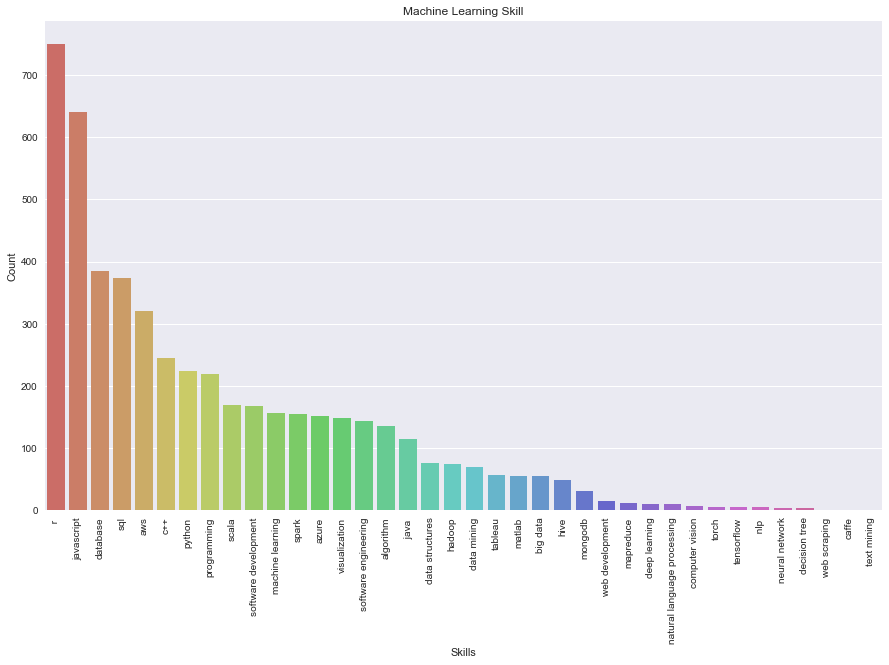

In [24]:
sns.set(rc={'figure.figsize':(15,9)})
g = sns.barplot(skill_series_ML.index, skill_series_ML.values, palette = 'hls')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Machine Learning Skill')
g.set(xlabel = 'Skills', ylabel = 'Count')

In [25]:
states = [re.sub("[^a-zA-Z]+", "", re.sub("[\(\[].*?[\)\]]", "", loc))[-2:].upper() for loc in df_jobs_ML['job location']]
df_jobs_ML.insert(3, "state", states)
df_jobs_ML

,job title,company,job location,state,machine learning,deep learning,data mining,neural network,nlp,natural language processing,...,tableau,math,computer science,statistics,physics,engineering,graduate degree,phd,bachelor,master
0,Director of Software Engineering/Magento eComm...,Chaparral Motorsports,"San Bernardino, CA 92410",CA,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
1,Data Scientist / Analytic Consultant 4,Wells Fargo,"Philadelphia, PA",PA,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Salesforce Solution Architect,Silverline Jobs,"Philadelphia, PA",PA,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,Strategic Business Developer - Powder Metals/I...,Carpenter Technology Corporation,"Philadelphia, PA 19103 (Belmont area)",PA,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,Technical Sales Representative / Sales Engineer,Ecolab,"Philadelphia, PA",PA,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5,"Manager, Workday Application Delivery & Support",PFM,"Philadelphia, PA",PA,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
6,Project Manager I,Philadelphia Redevelopment Authority,"Philadelphia, PA 19107 (City Center East area)",PA,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,Director of Contract Strategy,United BioSource Corporation (UBC),"Philadelphia, PA",PA,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,Sr. Web Engineer,Outward Inc,"Charlotte, NC",NC,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
9,Senior .Net/Cloud Software Engineer,"T4S Partners, Inc.","Englewood, CO 80111",CO,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [26]:
state_series_ML = df_jobs_ML["state"].value_counts()[:10]
state_series_ML.sort_values(ascending = False)

PA    622
MI    110
UT     89
NJ     80
CA     77
IA     70
VT     60
CO     49
NC     39
MD     26
Name: state, dtype: int64

In [27]:
company_series_ML = df_jobs_ML["company"].value_counts()[:20]
company_series_ML.sort_values(ascending = False)

Plante & Moran                           71
EMC Insurance                            67
Vermont Mutual Insurance                 60
Progressive Leasing                      49
T4S Partners, Inc.                       48
Comcast                                  44
Beaumont Health                          33
Children's Hospital of Philadelphia      26
Advantus Corp                            25
Outward Inc                              24
Chaparral Motorsports                    24
SAP                                      20
ASML                                     19
IQVIA                                    18
Johnson & Johnson Family of Companies    17
KPMG                                     16
Icon plc                                 16
Temple University Health System          16
Intelligent Waves Llc                    15
Citi                                     12
Name: company, dtype: int64